In [1]:
import pandas as pd
import pypowhegparse as ppp
pd.set_option('display.max_columns', None)
folder = "/home/apn/git/POWHEG-BOX-V2/directphotonjj/testrun-lhc/working"

## Checklimits

In [2]:
ppp.print_stats(folder)
ppp.print_warn_grep(folder,3)



#WARN    =  0
#WWARN   =  0
#WWWARN  =  0
#WWWWARN =  0


## Counters

In [3]:
#ddf = ppp.load_counter_folder(folder)
#ddf.xs("pwgcounters-st4").describe()

In [4]:
#ppp.multi_describe(ddf)#[["real time (sec)"]]

## Stat

In [5]:
ddf = ppp.load_stat_folder(folder)
#ddf.xs("pwg-0001-stat.dat").describe()

In [6]:
ppp.multi_describe(ddf)

proc                btilde pos.   weights:  btilde pos.   weights:+-stat  \
pwg-stat     count               15.000000                     15.000000   
             mean               277.066009                      4.011466   
             std                  4.778310                      1.032842   
             min                270.827080                      2.836778   
             25%                274.719831                      3.510510   
             50%                276.019826                      3.861309   
             75%                278.348297                      4.282248   
             max                291.877676                      7.099028   
pwg-st2-stat count               15.000000                     15.000000   
             mean               277.066009                      4.011466   
             std                  4.778310                      1.032842   
             min                270.827080                      2.836778   
             25%                274.719831                      3.510510   
             50%                276.019826                      3.861309   
             75%                278.348297                      4.282248   
             max                291.877676                      7.099028   

proc                btilde |neg.| weights:  btilde |neg.| weights:+-stat  \
pwg-stat     count                    15.0                          15.0   
             mean                      0.0                           0.0   
             std                       0.0                           0.0   
             min                       0.0                           0.0   
             25%                       0.0                           0.0   
             50%                       0.0                           0.0   
             75%                       0.0                           0.0   
             max                       0.0                           0.0   
pwg-st2-stat count                    15.0                          15.0   
             mean                      0.0                           0.0   
             std                       0.0                           0.0   
             min                       0.0                           0.0   
             25%                       0.0                           0.0   
             50%                       0.0                           0.0   
             75%                       0.0                           0.0   
             max                       0.0                           0.0   

proc                btilde Total (pos.-|neg.|):  \
pwg-stat     count                    15.000000   
             mean                    277.066009   
             std                       4.778310   
             min                     270.827080   
             25%                     274.719831   
             50%                     276.019826   
             75%                     278.348297   
             max                     291.877676   
pwg-st2-stat count                    15.000000   
             mean                    277.066009   
             std                       4.778310   
             min                     270.827080   
             25%                     274.719831   
             50%                     276.019826   
             75%                     278.348297   
             max                     291.877676   

proc                btilde Total (pos.-|neg.|):+-stat  \
pwg-stat     count                          15.000000   
             mean                            4.011466   
             std                             1.032842   
             min                             2.836778   
             25%                             3.510510   
             50%                             3.861309   
             75%                             4.282248   
             max                             7.099028   
pwg-st2-stat count               

## Top

In [7]:
dddf = ppp.load_top_folder(folder)
dddf

title                               pvalue      chi2  \
pwg-btlgrid 14 dim=           1    0.16698  1.909848   
               dim=           2   0.219192  1.509653   
               dim=           3   0.168741  1.894091   
               dim=           4   0.038766  4.271095   
               dim=           5   0.392129  0.732329   
...                                    ...       ...   
            7  dim=           6    0.19537  1.676653   
               dim=           7   0.187202  1.739504   
               dim=           8   0.969962  0.001418   
               dim=           9   0.969367  0.001475   
               dim=          10   0.983591  0.000423   

title                                                                          plot  
pwg-btlgrid 14 dim=           1   <pytopdrawer.topplot.TopPlot object at 0x7f2d2...  
               dim=           2   <pytopdrawer.topplot.TopPlot object at 0x7f2d2...  
               dim=           3   <pytopdrawer.topplot.TopPlot object at 0x7f2d2...  
               dim=           4   <pytopdrawer.topplot.TopPlot object at 0x7f2d2...  
               dim=           5   <pytopdrawer.topplot.TopPlot object at 0x7f2d2...  
...                                                                             ...  
            7  dim=           6   <pytopdrawer.topplot.TopPlot object at 0x7f2d2...  
               dim=           7   <pytopdrawer.topplot.TopPlot object at 0x7f2d2...  
               dim=           8   <pytopdrawer.topplot.TopPlot object at 0x7f2d2...  
               dim=           9   <pytopdrawer.topplot.TopPlot object at 0x7f2d2...  
               dim=          10   <pytopdrawer.topplot.TopPlot object at 0x7f2d2...  

[150 rows x 3 columns]

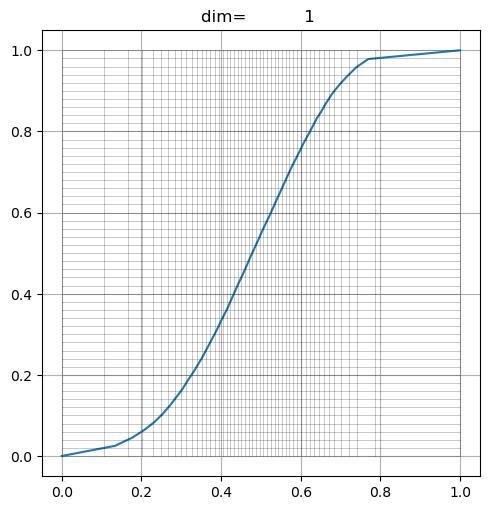

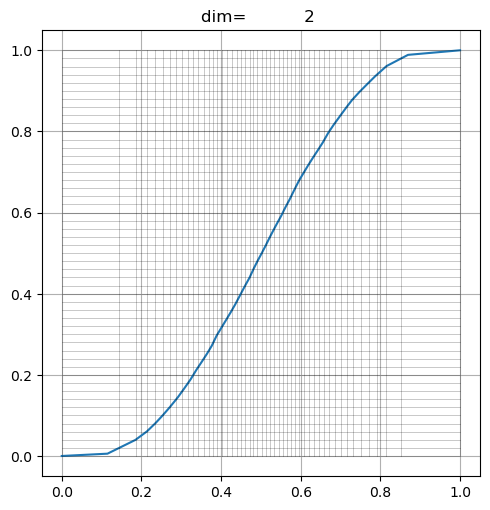

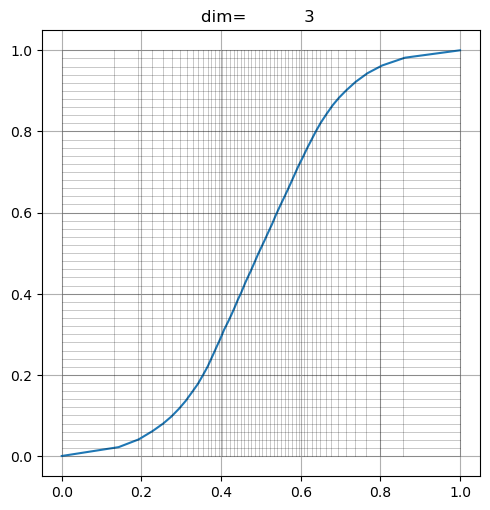

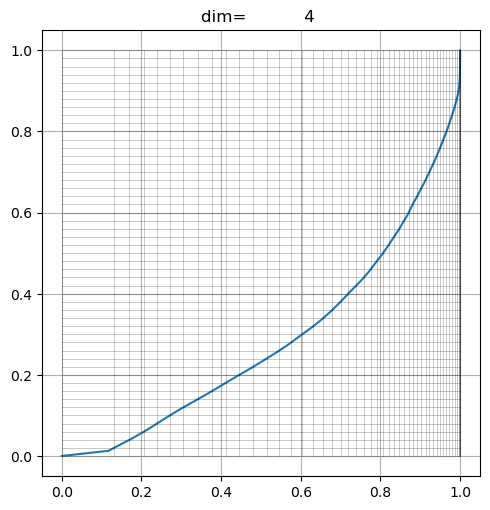

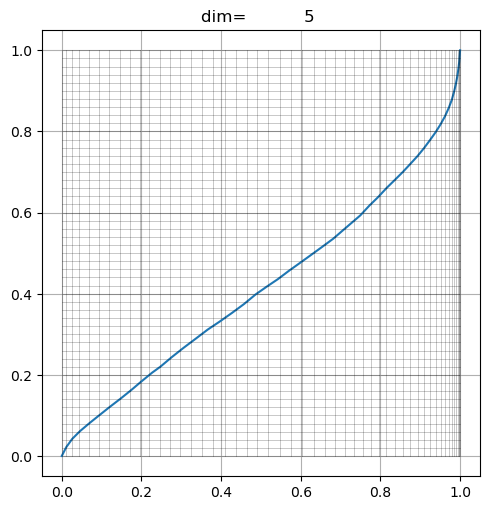

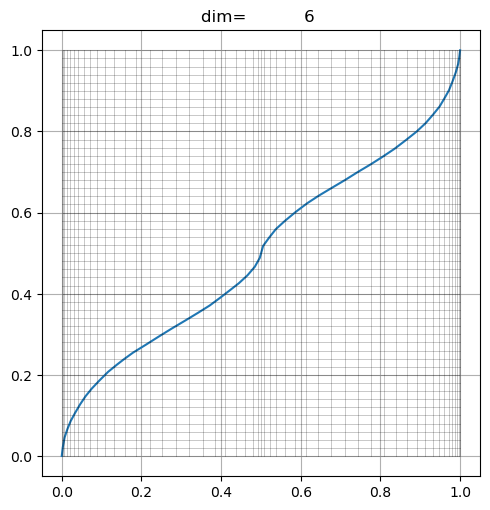

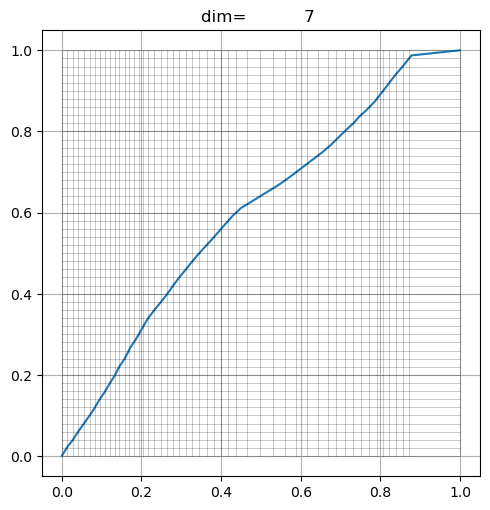

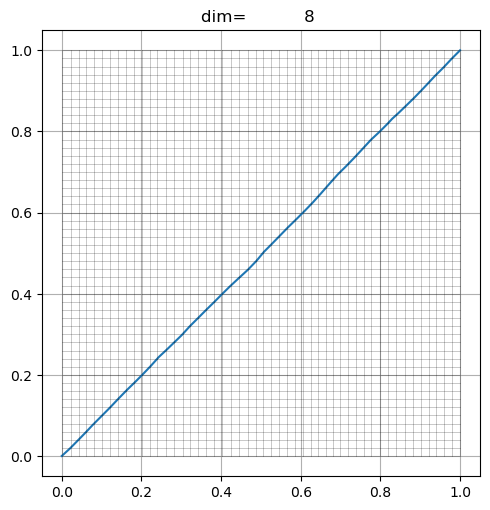

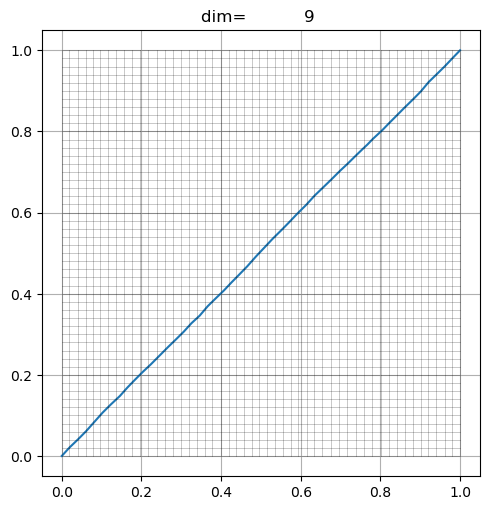

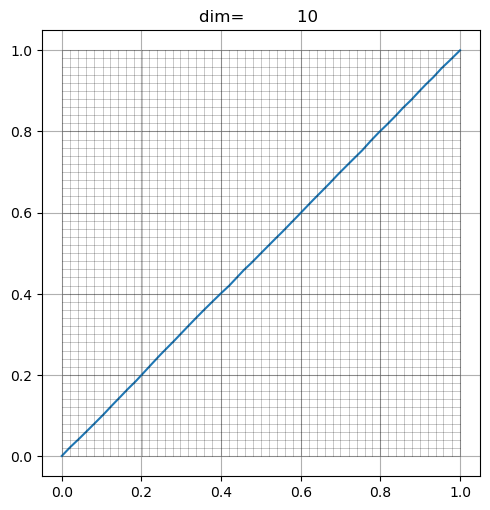

In [8]:
for p in dddf.xs("pwg-btlgrid").xs(1)["plot"]:
    p.show(size=(5,5),fmt="-")
#for p in dddf.xs("pwg-rmngrid").xs(1)["plot"]:
#    p.show(size=(5,5),fmt="-")

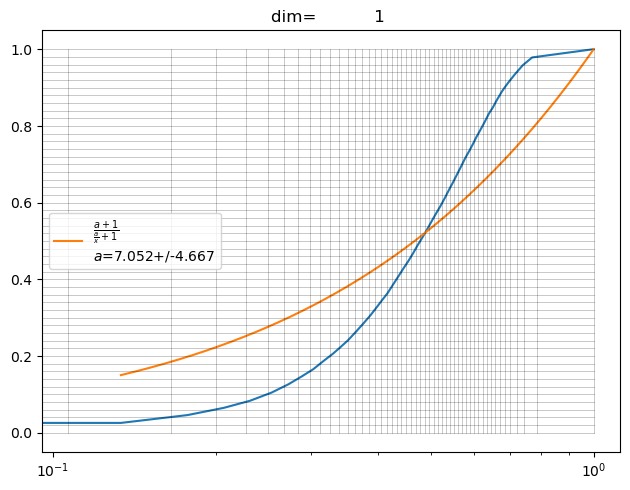

In [9]:
import numpy as np
from uncertainties import unumpy as unp
def fitr(x,a):
    return (a+1)/(a/x+1)
for p in [dddf.xs("pwg-btlgrid").xs(1)["plot"][0]]:
    p.fit(fitr,size=(5,5),fmt="-",logx=True,fselector=lambda x,y : np.logical_and(x>0,x>0) ,extrapolate=False,steps=10000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.95it/s]


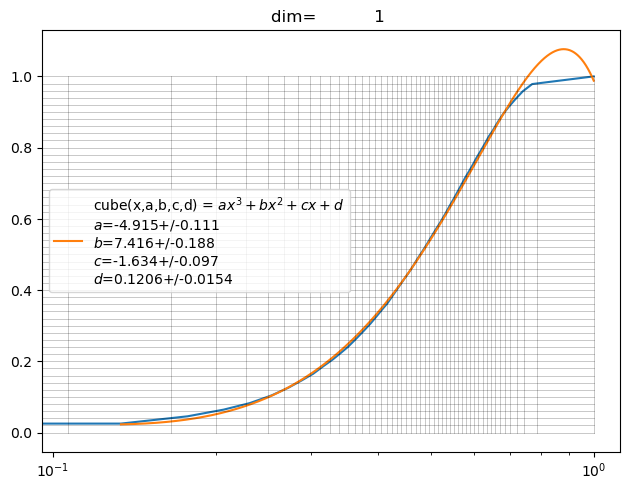

In [10]:

for p in [dddf.xs("pwg-btlgrid").xs(1)["plot"][0]]:
    p.auto(size=(10,10),fmt="-",logx=True,fselector=lambda x,y : x>0,extrapolate=False)

# 